In [1]:
import csv

In [2]:
CSV_FILENAME = "../gitignore/asymptote/medium2_2023_Aug_19_02_50_31_.csv"

In [3]:
def coerce(d):
    def c(v):
        if v == 'NA':
            return None
        else:
            try:
                return float(v)
            except ValueError:
                return v
    return {k: c(v) for (k, v) in d.items()}

with open(CSV_FILENAME, newline='') as f:
    dr = csv.DictReader(f)
    data = [coerce(d) for d in dr]
    tests = [fn for fn in dr.fieldnames if fn.endswith('_p')]
data

[{'filename': 'gitignore/asymptote//medium2_2023_Aug_19_02_50_31_1.cho',
  'test_100_52_12_time': 2.320628542,
  'test_100_52_12_p': 0.005526128183543061,
  'test_100_52_12_secure': 0.0,
  'test_100_103_25_time': 3.509516394,
  'test_100_103_25_p': 3.373082570552221e-11,
  'test_100_103_25_secure': 0.0,
  'test_100_154_38_time': None,
  'test_100_154_38_p': None,
  'test_100_154_38_secure': 0.0,
  'test_100_205_51_time': None,
  'test_100_205_51_p': None,
  'test_100_205_51_secure': 0.0,
  'test_100_256_64_time': None,
  'test_100_256_64_p': None,
  'test_100_256_64_secure': 0.0,
  'test_100_359_89_time': None,
  'test_100_359_89_p': None,
  'test_100_359_89_secure': 0.0,
  'test_100_461_115_time': None,
  'test_100_461_115_p': None,
  'test_100_461_115_secure': 0.0,
  'test_100_615_153_time': None,
  'test_100_615_153_p': None,
  'test_100_615_153_secure': 0.0,
  'test_100_768_192_time': None,
  'test_100_768_192_p': None,
  'test_100_768_192_secure': 0.0,
  'test_100_973_243_time': N

In [4]:
tests

['test_100_52_12_p',
 'test_100_103_25_p',
 'test_100_154_38_p',
 'test_100_205_51_p',
 'test_100_256_64_p',
 'test_100_359_89_p',
 'test_100_461_115_p',
 'test_100_615_153_p',
 'test_100_768_192_p',
 'test_100_973_243_p',
 'test_100_1229_307_p',
 'test_100_1536_384_p',
 'test_100_1946_486_p',
 'test_100_2458_614_p',
 'test_100_3072_768_p',
 'test_100_3840_960_p',
 'test_100_4813_1203_p',
 'test_100_6042_1510_p',
 'test_100_7578_1894_p']

In [6]:
from dataclasses import dataclass, field, fields
import re
headerparser = re.compile(r"(?P<p_column>test_(?P<iterations>\d+)_(?P<trainingN>\d+)_(?P<testingN>\d+)_p)")
@dataclass(frozen=True)
class TestPower:
    p_column: str = field(compare=False)
    t_column: str = field(compare=False, metadata={"dontparse": True})
    iterations: int
    trainingN: int
    testingN: int

test_powers = tuple(TestPower(t_column = match.group("p_column")[:-1] + "time",
                              **{field.name: field.type(match.group(field.name))
                                 for field in fields(TestPower)
                                 if field.metadata.get("dontparse") is None})
                    for match in map(headerparser.fullmatch, tests)
                    if match is not None
                   )
sorted(tp.trainingN / tp.testingN for tp in test_powers)

[4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.000831255195345,
 4.001055966209082,
 4.001324503311258,
 4.003257328990228,
 4.003257328990228,
 4.004115226337449,
 4.004115226337449,
 4.008695652173913,
 4.019607843137255,
 4.019607843137255,
 4.033707865168539,
 4.052631578947368,
 4.12,
 4.333333333333333]

In [7]:
buckets = [
    {"sec" : frozenset(d['filename']
                       for d in data
                       if d[t] is not None
                       and float(d[t]) > 0.05),
     "ins" : frozenset(d['filename']
                       for d in data
                       if d[t] is not None
                       and float(d[t]) <= 0.05
                       and float(d[t]) > (0.05 ** 3)),
     "neg" : frozenset(d['filename']
                       for d in data
                       if d[t] is not None
                       and float(d[t]) <= (0.05 ** 3)),
     "no_test"  : frozenset(d['filename'] for d in data if d[t] is None)}
    for t in tests
]
buckets

[{'sec': frozenset({'gitignore/asymptote//medium2_2023_Aug_19_02_50_31_101.cho',
             'gitignore/asymptote//medium2_2023_Aug_19_02_50_31_102.cho',
             'gitignore/asymptote//medium2_2023_Aug_19_02_50_31_103.cho',
             'gitignore/asymptote//medium2_2023_Aug_19_02_50_31_104.cho',
             'gitignore/asymptote//medium2_2023_Aug_19_02_50_31_106.cho',
             'gitignore/asymptote//medium2_2023_Aug_19_02_50_31_107.cho',
             'gitignore/asymptote//medium2_2023_Aug_19_02_50_31_109.cho',
             'gitignore/asymptote//medium2_2023_Aug_19_02_50_31_11.cho',
             'gitignore/asymptote//medium2_2023_Aug_19_02_50_31_111.cho',
             'gitignore/asymptote//medium2_2023_Aug_19_02_50_31_112.cho',
             'gitignore/asymptote//medium2_2023_Aug_19_02_50_31_115.cho',
             'gitignore/asymptote//medium2_2023_Aug_19_02_50_31_116.cho',
             'gitignore/asymptote//medium2_2023_Aug_19_02_50_31_120.cho',
             'gitignore/asymptot

In [49]:
def sanky_name(test, state):
    if state in ("nt", "no_test", "generated"):
        return state
    else:
        return headerparser.fullmatch(test).group('trainingN') + "_" + state
    
def sn_weight(name1, name2):
    def n(name):
        return int(name.strip('_secngi'))
    if "no_test" == name2:
        return (1000000, -n(name1))
    elif "generated" == name1:
        return (0, n(name2))
    else:
        return (n(name1), n(name2))

def sn_color(name):
    if "generated" == name:
        return "#00FF80"
    elif name.endswith("sec"):
        return "#00FF00"
    elif name.endswith("ins"):
        return "#EA9A00"
    elif name.endswith("neg"):
        return "#C60000"
    elif "no_test" == name:
        return "#A4A4A4"
    else:
        raise Exception(name)

In [51]:
sanky_ast = [
    ("generated", len(buckets[0]["sec"]), sanky_name(tests[0], "sec")),
    ("generated", len(buckets[0]["ins"]), sanky_name(tests[0], "ins")),
    ("generated", len(buckets[0]["no_test"]), sanky_name(tests[0], "no_test")),
    ("generated", len(buckets[0]["neg"]), sanky_name(tests[0], "neg"))
]

for (bl, tl), (bh, th) in zip(zip(buckets, tests), list(zip(buckets, tests))[1:]):
    for sl in ("sec", "ins", "neg", "no_test"):
        for sh in ("sec", "ins", "neg", "no_test"):
            nl = sanky_name(tl, sl)
            nh = sanky_name(th, sh)
            flow = len(bl[sl] & bh[sh])
            if nl != nh:
                sanky_ast.append((nl, flow, nh))
                
sanky_ast = sorted(filter(lambda tp: 0 != tp[1], sanky_ast),
                   key=lambda tp: sn_weight(tp[0], tp[2]),
                   reverse=False)

sanky_ast

[('generated', 317, '52_sec'),
 ('generated', 168, '52_ins'),
 ('generated', 15, '52_neg'),
 ('52_sec', 132, '103_sec'),
 ('52_sec', 122, '103_ins'),
 ('52_sec', 63, '103_neg'),
 ('52_ins', 23, '103_sec'),
 ('52_ins', 42, '103_ins'),
 ('52_ins', 103, '103_neg'),
 ('103_sec', 65, '154_sec'),
 ('103_sec', 65, '154_ins'),
 ('103_sec', 25, '154_neg'),
 ('103_ins', 20, '154_sec'),
 ('103_ins', 49, '154_ins'),
 ('103_ins', 95, '154_neg'),
 ('154_sec', 43, '205_sec'),
 ('154_sec', 30, '205_ins'),
 ('154_sec', 12, '205_neg'),
 ('154_ins', 8, '205_sec'),
 ('154_ins', 45, '205_ins'),
 ('154_ins', 61, '205_neg'),
 ('205_sec', 30, '256_sec'),
 ('205_sec', 14, '256_ins'),
 ('205_sec', 7, '256_neg'),
 ('205_ins', 5, '256_sec'),
 ('205_ins', 27, '256_ins'),
 ('205_ins', 43, '256_neg'),
 ('256_sec', 21, '359_sec'),
 ('256_sec', 11, '359_ins'),
 ('256_sec', 3, '359_neg'),
 ('256_ins', 1, '359_sec'),
 ('256_ins', 14, '359_ins'),
 ('256_ins', 26, '359_neg'),
 ('359_sec', 10, '461_sec'),
 ('359_sec', 10, 

In [52]:
for nl, flow, nh in sanky_ast:
    print(f"{nl}[{flow}]{nh}")

nodes = set()
for (n1, _, n2) in sanky_ast:
    nodes.add(n1)
    nodes.add(n2)
for node in nodes:
    print(f":{node} {sn_color(node)}")

generated[317]52_sec
generated[168]52_ins
generated[15]52_neg
52_sec[132]103_sec
52_sec[122]103_ins
52_sec[63]103_neg
52_ins[23]103_sec
52_ins[42]103_ins
52_ins[103]103_neg
103_sec[65]154_sec
103_sec[65]154_ins
103_sec[25]154_neg
103_ins[20]154_sec
103_ins[49]154_ins
103_ins[95]154_neg
154_sec[43]205_sec
154_sec[30]205_ins
154_sec[12]205_neg
154_ins[8]205_sec
154_ins[45]205_ins
154_ins[61]205_neg
205_sec[30]256_sec
205_sec[14]256_ins
205_sec[7]256_neg
205_ins[5]256_sec
205_ins[27]256_ins
205_ins[43]256_neg
256_sec[21]359_sec
256_sec[11]359_ins
256_sec[3]359_neg
256_ins[1]359_sec
256_ins[14]359_ins
256_ins[26]359_neg
359_sec[10]461_sec
359_sec[10]461_ins
359_sec[2]461_neg
359_ins[3]461_sec
359_ins[13]461_ins
359_ins[9]461_neg
461_sec[6]615_sec
461_sec[7]615_ins
461_ins[1]615_sec
461_ins[8]615_ins
461_ins[14]615_neg
615_sec[3]768_sec
615_sec[3]768_ins
615_sec[1]768_neg
615_ins[1]768_sec
615_ins[6]768_ins
615_ins[8]768_neg
768_sec[2]973_sec
768_sec[2]973_ins
768_ins[5]973_ins
768_ins[4]97

In [22]:
def t_name(p_name):
    return p_name.rstrip('p') + "time"

times = {t: {'min': min(d[t_name(t)] for d in data if d[t_name(t)] is not None),
             'max': max(d[t_name(t)] for d in data if d[t_name(t)] is not None),
             'mean': sum(d[t_name(t)] for d in data if d[t_name(t)] is not None)
                     /len([d[t_name(t)] for d in data if d[t_name(t)] is not None])}
         for t in tests
         if any(d[t_name(t)] for d in data)}
times

{'test_100_52_12_p': {'min': 2.202864588,
  'max': 2.418856423,
  'mean': 2.319816055153998},
 'test_100_103_25_p': {'min': 3.286376867,
  'max': 3.704451739,
  'mean': 3.508418992371135},
 'test_100_154_38_p': {'min': 4.402191926,
  'max': 5.055161078,
  'mean': 4.754509944940444},
 'test_100_205_51_p': {'min': 5.565239317,
  'max': 6.473136902,
  'mean': 6.04062603385427},
 'test_100_256_64_p': {'min': 6.744376771,
  'max': 7.803527018,
  'mean': 7.3059172492619044},
 'test_100_359_89_p': {'min': 9.020110051,
  'max': 10.463897048,
  'mean': 9.824206310539472},
 'test_100_461_115_p': {'min': 11.354704944,
  'max': 13.137504266,
  'mean': 12.371817197234042},
 'test_100_615_153_p': {'min': 14.884678499,
  'max': 17.356859676,
  'mean': 16.24550595422222},
 'test_100_768_192_p': {'min': 18.414583317,
  'max': 21.078053744,
  'mean': 20.218064324500002},
 'test_100_973_243_p': {'min': 23.190738406,
  'max': 26.535998996,
  'mean': 25.551187299},
 'test_100_1229_307_p': {'min': 29.195810

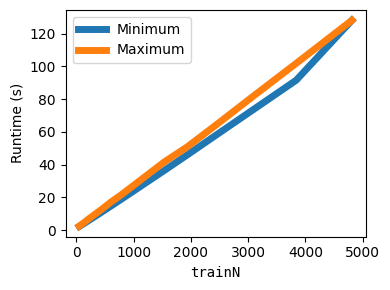

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
import re
import warnings
import os

plt.rcParams["figure.figsize"] = (4,3)
x = []
yH = []
yL = []
for ((p_name, valdict), tp) in zip(times.items(), test_powers):
    assert str(tp.trainingN) in p_name
    x.append(tp.trainingN)
    yH.append(valdict['max'])
    yL.append(valdict['min'])

plt.plot(x, yL, linewidth=5, markersize=10, label='Minimum')
plt.plot(x, yH, linewidth=5, markersize=10, label='Maximum')
plt.ylabel('Runtime (s)')
plt.xlabel('trainN', fontfamily='monospace')
plt.rcParams["figure.figsize"] = (6,6)
plt.legend()
plt.tight_layout()
plt.savefig(f'../paper/graphs/asymptote_time.pdf')
plt.show()